In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import json
from pathlib import Path

In [2]:
from ipypublish import nb_setup
plt = nb_setup.setup_matplotlib()
pd = nb_setup.setup_pandas()
sns.set(style='whitegrid')

/home/maousi/miniconda3/envs/ada/lib/python3.9/site-packages/ipypublish/scripts/nb_setup.py:226: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams[key] = val
/home/maousi/miniconda3/envs/ada/lib/python3.9/site-packages/ipypublish/scripts/nb_setup.py:226: MatplotlibDeprecationWarning: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  mpl.rcParams[key] = val
/home/maousi/miniconda3/envs/ada/lib/python3.9/site-packages/ipypublish/scripts/nb_setup.py:226: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  mpl.rcParams[key] = val
/home/maousi/miniconda3/envs/ada/lib/python3.9/site-packages/ipypublish/scripts/nb_setup.py:226: MatplotlibDeprecati

# Load and parse data

In [3]:
def parse_benchmark_result(fname):
    with open(fname, 'r') as f:
        r = json.load(f)
        
    # Build keys as tuples (m, n)
    which = Path(fname).stem.split('_')[-1][0]
    number = int(Path(fname).stem.split('_')[-1][1:])
    if which == 'm':
        r = {(number, int(k)): v for k, v in r.items()}
    elif which == 'n':
        r = {(int(k), number): v for k, v in r.items()}
    
    return r

In [4]:
def to_df(dic):
    df = pd.DataFrame(dic).unstack().reset_index()
    df.columns = ['m', 'n', 'repeat', 'time']
    return df

In [5]:
to_df(parse_benchmark_result('std_m100.json')).head()

,m,n,repeat,time
0,100,10,0,0.022120
1,100,10,1,0.010541
2,100,10,2,0.006783
3,100,50,0,0.013522
4,100,50,1,0.010747


## Load all benchmark files and concat

In [6]:
from glob import glob

df = []
for f in glob('*.json'):
    df.append(to_df(parse_benchmark_result(f)))
    
df = pd.concat(df).reset_index(drop=True)

In [7]:
df.head()

,m,n,repeat,time
0,100,10,0,0.022120
1,100,10,1,0.010541
2,100,10,2,0.006783
3,100,50,0,0.013522
4,100,50,1,0.010747


## Plot

In [8]:
def plot_df(df):
    sns.lineplot(x='n', y='time', data=df, hue='m', style='m', markers=True, palette='deep')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel('Time [s]')

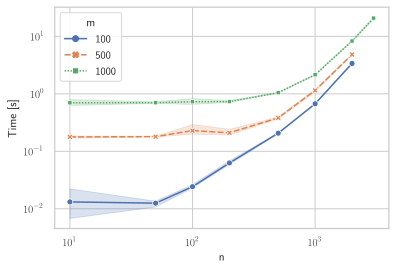

In [9]:
plt.figure(figsize=(6, 4))
plot_df(df)

In [10]:
df['mn'] = df['m'] * df['n']

In [11]:
def plot_df_mn(df):
    sns.lineplot(x='mn', y='time', data=df, markers=True, palette='deep')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel('Time [s]')
    plt.xlabel(r'$m\times n$')

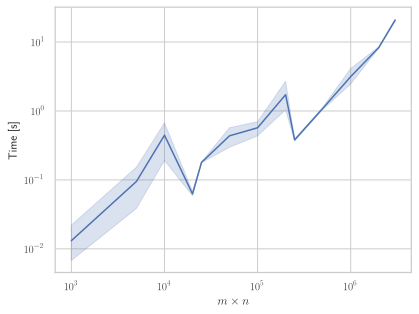

In [12]:
plot_df_mn(df)

In [13]:
df

,m,n,repeat,time,mn
0,100,10,0,0.022120,1000
1,100,10,1,0.010541,1000
2,100,10,2,0.006783,1000
3,100,50,0,0.013522,5000
4,100,50,1,0.010747,5000
...,...,...,...,...,...
77,500,1000,1,1.196810,500000
78,500,1000,2,1.147807,500000
79,500,2000,0,4.887072,1000000
80,500,2000,1,4.816476,1000000
